##  Arabic Poetry Classifier

## 1. Introduction


Arabic poetry is the oldest and most prominent form of Arabic literature today. Ancient Arabic poetry is probably the primary source for describing the social, political, and intellectual life in the Arab world. Modern poetry has gone through major changes and shifts, both in the form and in the topics. that led me to build an Arabic Poetry Classifier model.
In this project, a classification model is built to classify Arabic poetry based on the poet's origin.

## 2. Loading the Dataset 
The dataset contains around 11K sample of poems that extend from the 6th century to the present day. This dataset consist of 9 features and 11604 instance. In addition,it included 11594 poems of 591 poets.The total number of words was 1741848(before pre-processing)

link: https://www.kaggle.com/datasets/fahd09/arabic-poetry-dataset-478-2017/code

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import string
import pyarabic.araby as araby
import pyarabic.trans
from pyarabic.araby import strip_tashkeel ,normalize_ligature
import re 
from nltk.corpus import stopwords
from nltk.stem import arlstem
from nltk.stem.isri import ISRIStemmer
from nltk.stem.arlstem2 import ARLSTem2




import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline as SMOTE_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from IPython.display import Image


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score, recall_score, precision_score


In [3]:
df=pd.read_csv('all_poems.csv')

## Visual Assessment

In [4]:
df.sample(5)

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
30425,17178,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علم وتحكيم وشيب مفارق طلسن ريعان الشباب الراء...,علمٌ وتحكيمٌ وشيبُ مفارقِ,العصر العباسي,248,http://www.adab.com/modules.php?name=Sh3er&doW...,دعبل الخزاعي
51681,80409,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,نفتح ابواب قلوبنا لهم فيدخلون مثل غيمات من الع...,ترميمُ قلوبنا الكسيرة,العراق,536,http://www.adab.com/modules.php?name=Sh3er&doW...,ليث الصندوق
9691,55985,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,ناحت بني العيسي مصرع راحل كالرمح بات موسدا تح...,ناحت بني العيسي مصرع راحل,لبنان,152,http://www.adab.com/modules.php?name=Sh3er&doW...,إبراهيم اليازجي
42961,80805,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,"لو كان لي وطن , لو كان لي ناس ما صرت حرثا اذ ا...",غزة ليستْ أوّلا,مصر,411,http://www.adab.com/modules.php?name=Sh3er&doW...,عبد الرحيم أحمد الصغير(الماسخ)
382,68284,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عرفتك من عامين ينبوع طيبة وجها بسيطا كان وجهي ...,مرثاةُ قِطّة,سوريا,7,http://www.adab.com/modules.php?name=Sh3er&doW...,نزار قباني


In [5]:
df.tail()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
58016,86613,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لروح صهيل لا تحويه الاوقات ذنبك انك تمتد علي ا...,الوقت,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58017,86614,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اه لو اني ابني الشمس بعيني من طين هواء وسراب م...,الفلاح,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58018,86615,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,في عينيك يا امي لماذا الدمع منتظم كعقد الءلء ا...,أمّي,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58019,86616,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,النوم يوقظ طرفي الظامي علي لحن تموج من بعيد ار...,عن اللحن,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58020,86617,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,السلم الذي نزلت فيه لسماء سلم من الجنان جاء او...,السلم,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف


## Programticly  Assessment

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-null  object
 8   poet_name   58021 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


In [9]:
df.isna().sum()

poem_id       0
poem_link     0
poem_style    0
poem_text     1
poem_title    0
poet_cat      0
poet_id       0
poet_link     0
poet_name     0
dtype: int64

In [10]:
df.duplicated(subset=['poem_text']).sum()

327

In [100]:
df.duplicated(subset=['poem_link']).sum()

0

In [6]:
df[df.duplicated(subset=['poem_text'],keep=False)]

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
407,68884,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,ليس في وسعك يا سيدتي ان تصلحيني فلقد فات القطا...,تَشَبُّث,سوريا,7,http://www.adab.com/modules.php?name=Sh3er&doW...,نزار قباني
636,68900,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,ليس في وسعك يا سيدتي ان تصلحيني فلقد فات القطا...,تصميم,سوريا,7,http://www.adab.com/modules.php?name=Sh3er&doW...,نزار قباني
1365,67907,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,تلك المنازل كيف حال مقيمها انا قنعنا بعدها بر...,تلك المنازل,لبنان,31,http://www.adab.com/modules.php?name=Sh3er&doW...,إيليا أبو ماضي
1383,67926,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,تلك المنازل كيف حال مقيمها انا قنعنا بعدها بر...,تلك المنازل,لبنان,31,http://www.adab.com/modules.php?name=Sh3er&doW...,إيليا أبو ماضي
1773,66919,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,ذلك الرجل الذي استطاع اقتحام ملكتي علي صهوة رس...,اشهد برجل على صهوة رسالة.,سوريا,35,http://www.adab.com/modules.php?name=Sh3er&doW...,غادة السمان
...,...,...,...,...,...,...,...,...,...
57870,86485,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,امطلع زهر نجوم الكلام ومشرقه من خلال الحلك ات...,أَمَطلَع زُهر نُجومِ الكَلام,العصر الأندلسي,750,http://www.adab.com/modules.php?name=Sh3er&doW...,المعتمد بن عباد
57947,86600,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,ابا هاشم هشمتني الشفار فله صبري لذاك الاوار ذ...,أَبا هاشِمٍ هَشمتني الشِّفارُ,العصر الأندلسي,750,http://www.adab.com/modules.php?name=Sh3er&doW...,المعتمد بن عباد
57956,86621,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انفحة الروض رقت في صبا السحر من بعد ما بات وا...,أَنفحة الروض رقت في صبا السحرِ,العصر الأندلسي,750,http://www.adab.com/modules.php?name=Sh3er&doW...,المعتمد بن عباد
57959,86624,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لولا عيون من الواشين ترمقني وما احاذره من قول...,لولا عيون من الواشين ترمقني,العصر الأندلسي,750,http://www.adab.com/modules.php?name=Sh3er&doW...,المعتمد بن عباد


In [12]:
df.poem_style.unique()

array(['فصحى', '-', 'عامي'], dtype=object)

In [7]:
df['poem_text'][0]

'عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له "بعد غد تعود " لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطف

In [8]:
df[df['poem_style']=='-']

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
1177,70027,http://www.adab.com/modules.php?name=Sh3er&doW...,-,هم اكسبوك من السباق رهانا فربحت انت وادركوا ا...,أحمد ياسين,السعودية,25,http://www.adab.com/modules.php?name=Sh3er&doW...,عبدالرحمن العشماوي
53407,80726,http://www.adab.com/modules.php?name=Sh3er&doW...,-,اي فردوس انسل منه النساء وسكبن السراب علي سبات...,قصيدة النساء,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53408,80727,http://www.adab.com/modules.php?name=Sh3er&doW...,-,غمست اصابعها في الصحراء وكتبت بماء السراب قصيدة,قصيدة الماء,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53409,80728,http://www.adab.com/modules.php?name=Sh3er&doW...,-,"غافلتني كملكة لا تريد ان تري الرعية نزواتها , ...",نافورة,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53410,80729,http://www.adab.com/modules.php?name=Sh3er&doW...,-,خلعت اسنان البن وتمضمضت بالحبر خالعت طاعات طاع...,مخالعة,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53411,80730,http://www.adab.com/modules.php?name=Sh3er&doW...,-,مزجت جرحها بانتصاراته ونصبت تحت السماء ناموسية...,صباحية,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53412,80731,http://www.adab.com/modules.php?name=Sh3er&doW...,-,كانت مدجة كفزاعة وكنت عزلاء كريشة انفلت من جنا...,موازين قوى,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53413,80732,http://www.adab.com/modules.php?name=Sh3er&doW...,-,لعبت مع الاطفال الاستغماية طيرت طيارات ورق سكب...,سؤال,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53414,80733,http://www.adab.com/modules.php?name=Sh3er&doW...,-,من شرفة شقتهم الضيقة كنعش تدلي جسدها الفاره كع...,مجاسدة,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد
53415,80734,http://www.adab.com/modules.php?name=Sh3er&doW...,-,نصب مصيدته عند استدارة رمانه كتفها ولكن غلبته ...,سن يأس,السعودية,584,http://www.adab.com/modules.php?name=Sh3er&doW...,فوزية أبوخالد


In [10]:
df.describe(include=['O'])

,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_link,poet_name
count,58021,58021,58020,58021,58021,58021,58021
unique,58021,3,57693,56872,26,652,652
top,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اذا الرتبة العليا اتك اثابة وفاروق عالي الراس...,الشاعر,العصر العباسي,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي
freq,1,57894,3,17,19417,2142,2142


## Cleening 

In [15]:
data=df.copy()

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

poem_id       0
poem_link     0
poem_style    0
poem_text     0
poem_title    0
poet_cat      0
poet_id       0
poet_link     0
poet_name     0
dtype: int64

In [19]:
df['poem_style']=df['poem_style'].str.replace('-','فصحى')

In [20]:
df.drop_duplicates(subset=['poem_text'],inplace=True)

In [21]:
df.select_dtypes(exclude='number').nunique()

poem_link     57693
poem_style        2
poem_text     57693
poem_title    56574
poet_cat         26
poet_link       652
poet_name       652
dtype: int64

In [22]:
df.select_dtypes(include='number').nunique()

poem_id    57693
poet_id      652
dtype: int64

### EDA 

In [24]:
Per_Cat=df.poet_cat.value_counts().to_frame().reset_index()
Per_Cat.columns=['poet_cat','value']
Per_Cat['percentage_cat']=(Per_Cat['value']/Per_Cat['value'].sum())*100
Per_Cat=Per_Cat.iloc[:,]

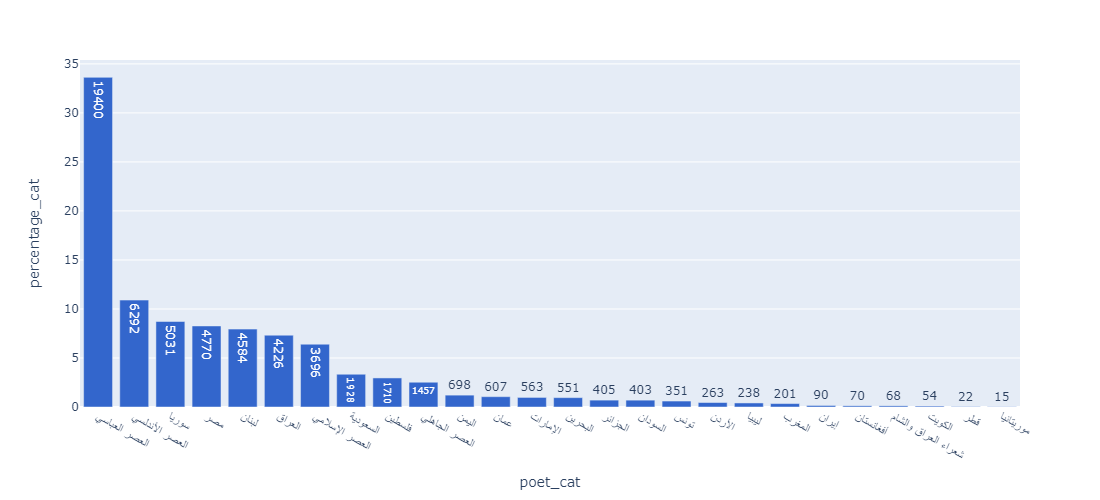

In [32]:
fig=px.bar(Per_Cat,x='poet_cat',y='percentage_cat',color_discrete_sequence=px.colors.qualitative.G10,text='value',width=1100)
img_bytes = fig.to_image(format="png")

Image(img_bytes)

In [126]:
df.poem_style.value_counts()

فصحى    57599
عامي       94
Name: poem_style, dtype: int64

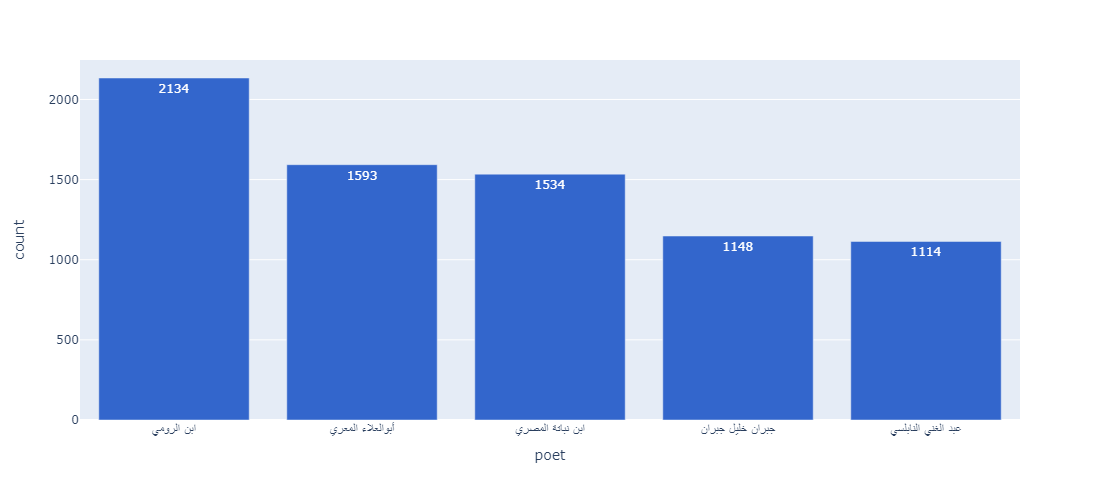

In [34]:
vis_2=df['poet_name'].value_counts().to_frame().reset_index()
vis_2.columns=['poet','count']
vis_2=vis_2.nlargest(5,'count')


fig=px.bar(vis_2,x='poet',y='count',color_discrete_sequence=px.colors.qualitative.G10,text='count',width=1100)
img_bytes = fig.to_image(format="png")

Image(img_bytes)


## Preproccessing

#### 3.1 Text_Cleaning

In [35]:
arabic_punctuations='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~،؛؟”“``….'+'0123456789'

def Remove_punctuations(txt):
    return txt.translate(str.maketrans('', '', arabic_punctuations))

def Text_Cleaning(text):
    text=pyarabic.trans.normalize_digits(text, source='all', out='west') # convert diffrent type of numbers into E number
    text = re.sub("[a-zA-Z]", "", text) # remove english letters
    text = re.sub(r"\s+", ' ',text) #remove long spaces 

    text = text.translate(str.maketrans('','', arabic_punctuations)) # remove punctuation
    text = re.sub(' +', ' ',text) # remove extra space
    return text


#### 3.2 Normalization

In [36]:
def normlize(text):
    text = re.sub("ة", "ه", text)
    text = re.sub("[إأآا]", "ا", text)
    text=araby.normalize_hamza(text)
    text=normalize_ligature(text)
    text=strip_tashkeel(text)
    return text

#### 3.3 Tokenization and Removing Stop Words

- The stop words that have been installed do not comply with preprocessing, so  we need to apply preprocessing functions to the stop words first.

In [37]:
df['poem_text'].str.contains('اليك').any()


True

In [38]:
for item in stopwords.words('arabic'):
    if item=='اليك':
        print("Not Found")
    elif item=='إليك':
        print("Found")

Found


In [39]:
Arabic_stopwords=[]
for item in stopwords.words('arabic'):
    Arabic_stopwords.append(normlize(item))

In [40]:
def Tokens_Stop_Words(text):
    tokens = araby.tokenize(text)
    return [w for w in tokens if w not in Arabic_stopwords ]

### 3.4 Stemming

In [41]:
from nltk.stem.isri import ISRIStemmer
stemmer = ARLSTem2()
ISRIS_st = ISRIStemmer()
def stem(arr):
    arr=[stemmer.stem(word) for word in arr]
    return ' '.join(arr)


In [42]:
df['poem_text']=df['poem_text'].apply(Text_Cleaning).apply(Remove_punctuations).apply(normlize).apply(Tokens_Stop_Words).apply(stem)
df['poet_cat']=df['poet_cat'].apply(Text_Cleaning).apply(Remove_punctuations).apply(normlize)

In [43]:
test_sample=df.sample(5).index

# get test sample 
# indexs=[x for x in test_sample]
index1=test_sample[0]
index2=test_sample[1]
index3=test_sample[2]
index4=test_sample[3]
index5=test_sample[4]

test_sample_1=df.iloc[index1,[3,5]]
test_sample_2=df.iloc[index2,[3,5]]
test_sample_3=df.iloc[index1,[3,5]]
test_sample_4=df.iloc[index2,[3,5]]
test_sample_5=df.iloc[index1,[3,5]]


df.drop([index1,index2,index3,index4,index5],axis=0,inplace=True)

In [45]:
df_test=df.copy()

In [159]:
labels=['العصر العباسي', 'العصر الاندلسي', 'سوريا', 'مصر', 'لبنان', 'العراق','العصر الاسلامي', 'السعوديه', 'فلسطين', 'العصر الجاهلي', 'اليمن',
       'عمان', 'البحرين', 'الامارات', 'السودان', 'الجزاءر', 'تونس', 'الاردن','ليبيا', 'المغرب', 'ايران', 'افغانستان', 'شعراء العراق والشام','الكويت', 'موريتانيا', 'قطر']
# df_test=pd.DataFrame()

# for item in labels:

#     length=round((df[df['poet_cat']==item].shape[0])/3)
#     temp=df[df['poet_cat']==item].sample(length)
#     df_test=pd.concat([df_test,temp])

In [154]:
df_test.poet_cat.value_counts()

Index(['العصر العباسي', 'العصر الاندلسي', 'سوريا', 'مصر', 'لبنان', 'العراق',
       'العصر الاسلامي', 'السعوديه', 'فلسطين', 'العصر الجاهلي', 'اليمن',
       'عمان', 'البحرين', 'الامارات', 'السودان', 'الجزاءر', 'تونس', 'الاردن',
       'ليبيا', 'المغرب', 'ايران', 'افغانستان', 'شعراء العراق والشام',
       'الكويت', 'موريتانيا', 'قطر'],
      dtype='object')

## Approch 1 

#### Assumtions based on data analysis:

- conseder   'العراق', 'سوريا', 'مصر', 'تونس', 'السعوديه', 'لبنان', 'فلسطين',
'اليمن',  'السودان', 'البحرين','ليبيا', 'عمان', 'المغرب',
       'الجزاءر', 'الامارات', 'الاردن', 'الكويت', 'قطر', 'موريتانيا',
       'شعراء العراق والشام'and  'افغانستان', 'ايران' as 'الشعر الحديث'

       
- The poem without harakat


### Model Used : 
- i will train three diffrent models with grid search to find the best model and the best hyper pprameters 

In [46]:
# in this case only i dived the data 50% , becouse it takes so long time to finsh the traning, and the reson lead me to do  
# df_test=df.copy()
# df_test=df_test.sample(round(57691/2))



df_test['poet_cat']=df_test.poet_cat.replace(dict.fromkeys([
  'العراق', 'سوريا', 'مصر', 'تونس', 'السعوديه', 'لبنان', 'فلسطين',
       'اليمن',  'السودان', 'البحرين','ليبيا', 'عمان', 'المغرب',
       'الجزاءر', 'الامارات', 'الاردن', 'الكويت', 'قطر', 'موريتانيا',
       'شعراء العراق والشام', 'افغانستان', 'ايران'], 'الشعر الحديث'))


X=df_test['poem_text']
y=df_test['poet_cat']


tfidf=TfidfVectorizer( min_df=20, max_features=500,ngram_range=(1, 2),lowercase=False)
X=tfidf.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:



models = [
    RandomForestClassifier(random_state=42),
    MultinomialNB(),
    SGDClassifier(random_state=42)
]



grid_params = [
    {'n_estimators': [100, 300],'max_features': ['sqrt', 'log2'],'criterion' :['gini', 'entropy']},
    {"alpha": [0.1, 0.5, 1.0]},
    {"loss": ["hinge", "log_loss", "modified_huber"], "penalty": ["l2", "l1", "elasticnet"]}
]



results = []
best_params=[]

for model, params in zip(models, grid_params):

    # Model buliding and traning 
    clf = GridSearchCV(model, params, cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evalutuin 
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')

    # Stoeing the hyperprameters and results
    best_params.append((type(model).__name__,clf.best_estimator_))
    results.append((type(model).__name__, accuracy, recall, precision))
    print("Done Model")

Done Model


c:\Users\P1\anaconda3\envs\Project1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Done Model
Done Model


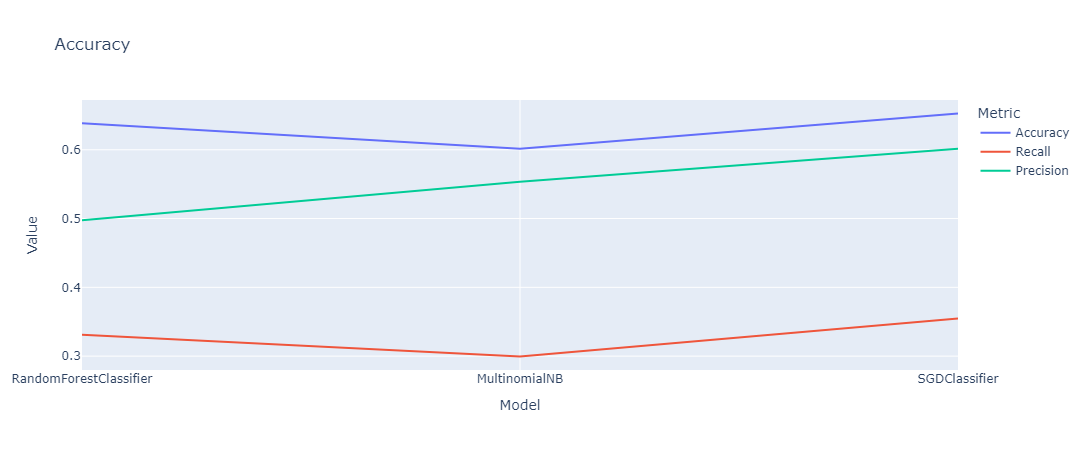

In [14]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Recall", "Precision"])
results_df=results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
# Plot the results
fig = px.line(results_df, x="Model", y="Value", color="Metric", title="Accuracy")
img_bytes = fig.to_image(format="png")

Image(img_bytes)

## Model 1

### Model Buliding 

### Model Used : 'RndomForest' 
- As we see above, Random Forest and SGDClassifier are almost similar, but I chose to use Random Forest due to its ability to handle class imbalance and reduce the risk of overfitting.

In [54]:
def model(X,y):
    # split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #  ** the hyperprameteri have beed difiede after using Grid Search ***
    text_clf_RF= Pipeline([('tfidf', TfidfVectorizer( min_df=20, max_features=500,ngram_range=(1, 2),lowercase=False)),
                     ('clf', RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500,oob_score=True,random_state=42))])

    # Model traing
    text_clf_RF.fit(X_train, y_train)
    cv_scores = cross_val_score(text_clf_RF, X_train, y_train, cv=5)


    # Make predictions on the test set
    y_pred = text_clf_RF.predict(X_test)


    # Evalutuin 
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')


    print(metrics.classification_report(y_test,y_pred))
    print("Accuracy is:  ",accuracy)
    print("Precision is:  ",precision)
    print("Recall is:  ",recall)

    return text_clf_RF ,cv_scores

In [55]:
def predection_preprocessing(txt):
    txt=pd.Series(data=txt)
    txt=txt.apply(Text_Cleaning).apply(Remove_punctuations).apply(normlize).apply(Tokens_Stop_Words).apply(stem)
    return txt
    

    
def model_test(model):
    global test_sample_1 , test_sample_2

    test1=predection_preprocessing(test_sample_1[0])
    test2=predection_preprocessing(test_sample_2[0])

    pred1=model.predict(test1)[0]
    pred2=model.predict(test2)[0]

    print("The actual value is:  "+ test_sample_1[1])
    print("The predection value is:  "+ pred1)

    print("\n______________________________________\n")

    print("The actual value is:  "+ test_sample_2[1])
    print("The predection value is:  "+ pred2)

### Model Training

In [56]:
X=df_test['poem_text']
y=df_test['poet_cat']

model_1,cv_scores=model(X,y)




                precision    recall  f1-score   support

  الشعر الحديث       0.71      0.84      0.77      5386
العصر الاسلامي       0.35      0.02      0.04       715
العصر الاندلسي       0.51      0.01      0.03      1317
 العصر الجاهلي       0.27      0.01      0.03       289
 العصر العباسي       0.55      0.72      0.62      3831

      accuracy                           0.63     11538
     macro avg       0.48      0.32      0.30     11538
  weighted avg       0.60      0.63      0.57     11538

Accuracy is:   0.6335586756803605
Precision is:   0.4761391560155306
Recall is:   0.32127149628504537


### Performance Report

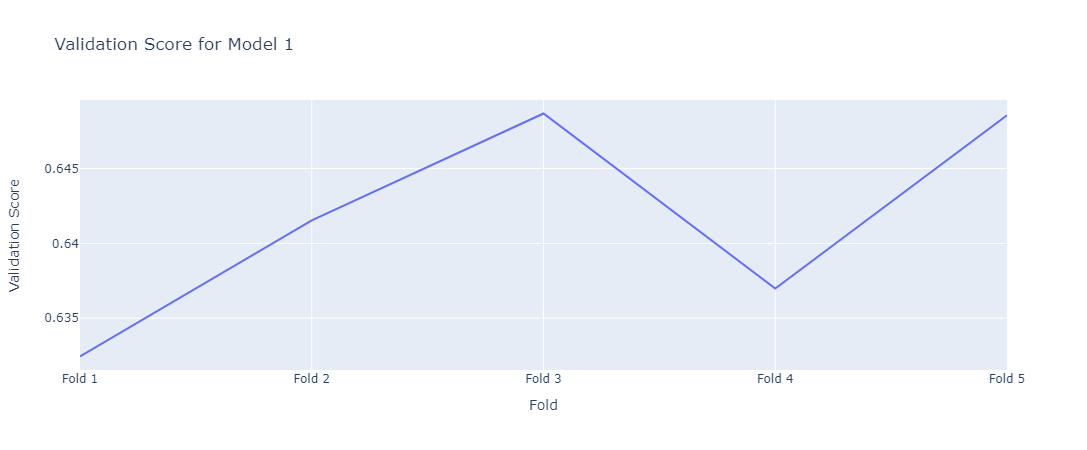

In [12]:
# create a dataframe to store the validation and testing scores
scores = pd.DataFrame(data={
    'Fold': ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'],
    'Validation Score': cv_scores,
})

# # plot the validation and testing scores using Plotly
fig = px.line(scores, x='Fold', y='Validation Score',title='Validation Score for Model 1')
img_bytes = fig.to_image(format="png")

Image(img_bytes)

Test

In [223]:
model_test(model_1)

The actual value is:  فلسطين
The predection value is:  الشعر الحديث

______________________________________

The actual value is:  العصر العباسي
The predection value is:  العصر العباسي


# Model 2
- Model 2 Using SMOTE (Synthetic Minority Over-sampling Technique) which is a commonly used oversampling method for dealing with imbalanced datasets in machine learning. 

###  Model Building

In [57]:
def Model_SMOTE(X,y):

    # initialize a Random Forest classifier
    text_clf = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500,oob_score=True,random_state=42)
    tfidf=TfidfVectorizer( min_df=20, max_features=500,ngram_range=(1, 2),lowercase=False)
    smote = SMOTE(sampling_strategy="auto")


    X=tfidf.fit_transform(X).toarray()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


    text_clf.fit(X_train,y_train)
    cv_scores2 = cross_val_score(text_clf, X_train, y_train, cv=5)


    # Make predictions on the test set
    y_pred = text_clf.predict(X_test)


    # Evalutuin 
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')


    from sklearn import metrics
    print(metrics.classification_report(y_test,y_pred))
    print("Accuracy is:  ",accuracy)
    print("Precision is:  ",precision)
    print("Recall is:  ",recall)

    return text_clf ,cv_scores2,tfidf


def predict_text_class(model,tfidf):
    global test_sample_1 , test_sample_2

    test1=predection_preprocessing(test_sample_1[0])
    test2=predection_preprocessing(test_sample_2[0])

    test1=tfidf.transform(test1)
    test2=tfidf.transform(test2)


    pred1=model.predict(test1)[0]
    pred2=model.predict(test2)[0]

    print("The actual value is:  "+ test_sample_1[1])
    print("The predection value is:  "+ pred1)

    print("\n______________________________________\n")

    print("The actual value is:  "+ test_sample_2[1])
    print("The predection value is:  "+ pred2)

### Model Training

In [58]:
X=df_test['poem_text']
y=df_test['poet_cat']
model_2,cv_scores2,vectorizer=Model_SMOTE(X,y)

                precision    recall  f1-score   support

  الشعر الحديث       0.85      0.78      0.82      5430
العصر الاسلامي       0.93      0.96      0.94      5413
العصر الاندلسي       0.88      0.93      0.91      5311
 العصر الجاهلي       0.94      0.99      0.96      5307
 العصر العباسي       0.78      0.73      0.75      5386

      accuracy                           0.88     26847
     macro avg       0.88      0.88      0.88     26847
  weighted avg       0.88      0.88      0.88     26847

Accuracy is:   0.8777144559913584
Precision is:   0.8753172309131647
Recall is:   0.8782600260321967


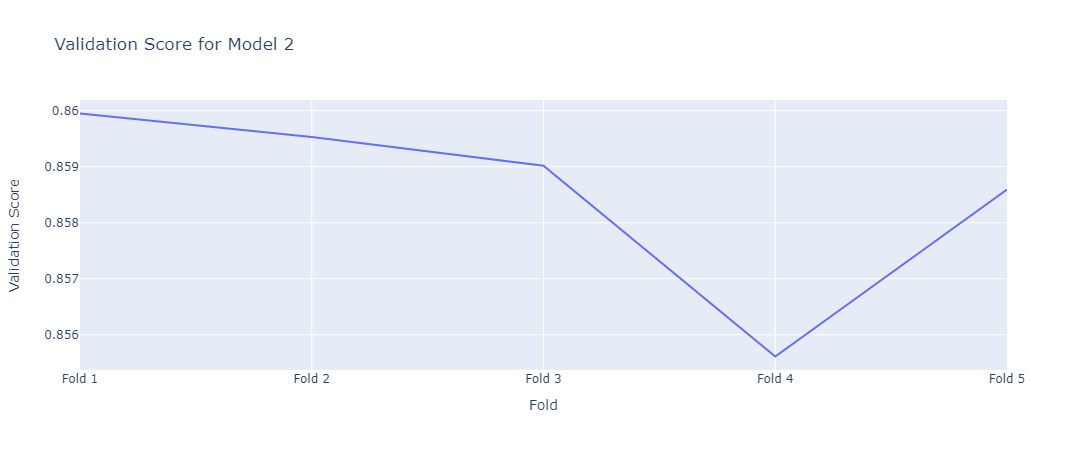

In [13]:
# create a dataframe to store the validation and testing scores
scores = pd.DataFrame(data={
    'Fold': ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'],
    'Validation Score': cv_scores2,
})

# # plot the validation and testing scores using Plotly
fig = px.line(scores, x='Fold', y='Validation Score',title='Validation Score for Model 2')
img_bytes = fig.to_image(format="png")

Image(img_bytes)

In [60]:
predict_text_class(model_2,tfidf)

The actual value is:  العصر الاسلامي
The predection value is:  العصر الاسلامي

______________________________________

The actual value is:  العراق
The predection value is:  الشعر الحديث


### Model 3

- one of the methodologies for dealing with imbalanced data by dividing the dataset into sub-data and deployed it into sub-models.



In [62]:
label_1=['العصر العباسي']
label_2=['لبنان','سوريا','العراق','العصر الاندلسي','العصر الاسلامي','مصر']
label_3=['السعوديه',  'فلسطين','العصر الجاهلي']
label_4=['تونس', 'اليمن',  'السودان', 'البحرين','ليبيا', 'عمان', 'المغرب','الجزاءر', 'الامارات', 'الاردن', 'الكويت', 'قطر', 'موريتانيا','شعراء العراق والشام', 'افغانستان', 'ايران']

label_model_1=label_2+label_3+label_4
label_model_2=label_1+label_3+label_4
label_model_3=label_1+label_2+label_4
label_model_4=label_1+label_2+label_3

In [63]:
def label(label):
    # get copy of data
    df_p3=df.copy()

    # replace any aother label as 'وقت اخر'
    df_p3['poet_cat']=df_p3.poet_cat.replace(dict.fromkeys(label, 'وقت اخر'))

    # get the avrage number of data to avoid imablnce dataset
    sample_value=df_p3.loc[df_p3['poet_cat']!='شعر اخر','poet_cat'].value_counts().mean()

    # take a sample of  'وقت اخر' class with avrage number of data for each class
    df_1=df_p3[df_p3['poet_cat']=='وقت اخر'].sample(round(sample_value))

    df_2=df_p3[df_p3['poet_cat']!='وقت اخر']

    data=pd.concat([df_1,df_2])

    X=data['poem_text']
    y=data['poet_cat']


    return X,y


def predict_text_class(text, model1, model2, model3,model4):
    # Preprocess the text
    
    # Use the first model to make a prediction
    pred = model1.predict(text)[0]
    
    # If the prediction is not exists, use the second model
    if pred == 'وقت اخر':
        pred = model2.predict(text)[0]
        
        # If the prediction is not exists, use the third model
        if pred == 'وقت اخر':
            pred = model3.predict(text)[0]
            
            # If the prediction is not exists, use the third model
            if pred== 'وقت اخر':
                pred = model4.predict(text)[0]
                
    
    return pred

In [64]:
X,y=label(label_model_1)
model3_1,cv_scores3_1=model(X,y)


               precision    recall  f1-score   support

العصر العباسي       0.67      0.54      0.60      3903
      وقت اخر       0.72      0.82      0.77      5746

     accuracy                           0.71      9649
    macro avg       0.70      0.68      0.68      9649
 weighted avg       0.70      0.71      0.70      9649

Accuracy is:   0.7063944450202093
Precision is:   0.6972779973765959
Recall is:   0.6791908131749396


In [65]:
X,y=label(label_model_2)
model3_2,cv_scores3_2=model(X,y)

                precision    recall  f1-score   support

        العراق       0.51      0.23      0.32       844
العصر الاسلامي       0.48      0.26      0.34       709
العصر الاندلسي       0.44      0.52      0.48      1246
         سوريا       0.46      0.54      0.50       982
         لبنان       0.69      0.40      0.51       938
           مصر       0.49      0.34      0.40       955
       وقت اخر       0.31      0.52      0.39      1694

      accuracy                           0.43      7368
     macro avg       0.49      0.40      0.42      7368
  weighted avg       0.47      0.43      0.42      7368

Accuracy is:   0.4256243213897937
Precision is:   0.4860537225846874
Recall is:   0.40121103904674704


In [66]:
X,y=label(label_model_3)
model3_3,cv_scores3_3=model(X,y)

               precision    recall  f1-score   support

     السعوديه       1.00      0.01      0.01       378
العصر الجاهلي       0.44      0.04      0.08       291
       فلسطين       1.00      0.00      0.01       315
      وقت اخر       0.75      0.99      0.86      2920

     accuracy                           0.75      3904
    macro avg       0.80      0.26      0.24      3904
 weighted avg       0.77      0.75      0.65      3904

Accuracy is:   0.7479508196721312
Precision is:   0.7985788447197844
Recall is:   0.2611414338915751


In [67]:
X,y=label(label_model_4)
model3_4,cv_scores3_4=model(X,y)

                     precision    recall  f1-score   support

          افغانستان       0.00      0.00      0.00        14
             الاردن       0.00      0.00      0.00        45
           الامارات       0.50      0.03      0.06        94
            البحرين       0.90      0.20      0.33        89
            الجزاءر       0.50      0.01      0.02        85
            السودان       0.89      0.23      0.37        73
             الكويت       0.00      0.00      0.00        19
             المغرب       0.00      0.00      0.00        38
              اليمن       0.90      0.06      0.10       163
              ايران       0.00      0.00      0.00        19
               تونس       1.00      0.03      0.06        67
شعراء العراق والشام       0.00      0.00      0.00         9
               عمان       0.67      0.02      0.03       124
                قطر       0.00      0.00      0.00         5
              ليبيا       0.00      0.00      0.00        45
          موريتانيا    

c:\Users\P1\anaconda3\envs\Project1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\P1\anaconda3\envs\Project1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\P1\anaconda3\envs\Project1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\P1\anaconda3\envs\Project1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with 

In [76]:
test1_model_3=test_sample_1[0]

text=predection_preprocessing(test1_model_3)
pred_1=predict_text_class(text,model3_1,model3_2,model3_3,model3_4)

print("The actual value is:  "+ test_sample_1[1])
print("The predection value is:  "+ pred_1)


print("______________________________________\n")


test2_model_3=test_sample_2[0]

text=predection_preprocessing(test2_model_3)
pred2=predict_text_class(text,model3_1,model3_2,model3_3,model3_4)

print("The actual value is:  "+ test_sample_2[1])
print("The predection value is:  "+ pred2)

The actual value is:  العصر الاسلامي
The predection value is:  العصر الاسلامي
______________________________________

The actual value is:  العراق
The predection value is:  العراق


### Conclusion 
After training three different models with different approaches, it turns out that the best model result is Model 2, which uses SMOTE technology.

### Future Improvement:
The future improvement that could be helpful is using PCA (Principal Component Analysis) , which will enhance the model performance in terms of accuracy and speed of execution.

In [61]:
import joblib

# Save the TfidfVectorizer and RandomForestClassifier models
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(model_2, 'random_forest_classifier_final_model.joblib')

['random_forest_classifier_final_model.joblib']

### Error Analysis Section

In [99]:
# قصيدة الأمير عبدالرحمن بن مساعد في سمو ولي العهد الأمير محمد بن سلمان
text1='اصعد بعزمك ان المجد متصل وهل تمل صعودا ايها البطل انت المفكر قد نادتك نهضتنا انت المجدد والمامول والامل انت المظفر لا تثنيك معضلة اعداء همتك التقصير والكسل'
actual='السعودية'

#preproccing
text1=predection_preprocessing(text1)
text1=vectorizer.transform(text1)


pred1=model_2.predict(text1)[0]

print("The actual value is:  "+ actual)
print("The prediction value is:  "+ pred1)

print("\n______________________________________\n")





The actual value is:  السعودية
The prediction value is:  العصر العباسي

______________________________________



#### As  we see above the prediction value is  العصر العباسي while The actual value is:  السعودية , that because all of poems that in العصر العباسي are in فصحى

## Summary

In this project, a classification model built to classify Arabic poetry based on the poet's origin.the prject go thrghuo multiple phases :
### Data Cleening
- i found that there is duplicated valuse in'poem_text' and there are in incorrect data in 'poem_style'
### EDA 
- In EDA phase i found that the data set actually imbalnced data which will strongly imapact on model pefrmence.
### Text Preproccessing: 

            1- Text_Cleaning:is the process of removing irrelevant and unnecessary information from the raw text data.
            2- Normalization: is the process of converting text into a standard or normalized
            3- Tokenization: is the process of breaking down text into individual units called tokens. 
            4- Removing Stop Word: Stop words are common words in the text that do not carry much meaning.
            5- Stemming: is the process of reducing words to their base or root form.


                        
### Model Building and Testing: 

- Model1: Training the model without additional preprocessing such as undersampling and oversampling.
- Model2 Using SMOTE (Synthetic Minority Over-sampling Technique) which is a commonly used oversampling method for dealing with imbalanced datasets in machine learning.
- Model3 is one of the methodologies for dealing with imbalanced data by dividing the dataset into sub data and then deploy it into submodels.